In [1]:
# Vraag 1
import scipy.stats as stats
import math
print(stats.norm.cdf(180, 170.5, 5.6)) #1950
print(stats.norm.cdf(186.5, 176.1, 7.7)) #2000

# Piet uit 1950 was groter dan Jan uit 2000 in vergelijking met de algemene populatie, omdat er meer oppervlakte links is
# bij Piet.

0.9550976266652204
0.9115961079383956


In [2]:
# Vraag 2
import pandas as pd
hotels = pd.read_csv('hotels.csv')

len(hotels.country.value_counts())

# Er zijn 177 landen vanwaar de gasten komen.

177

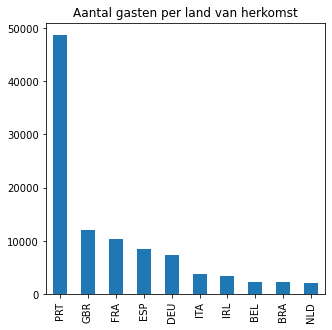

In [3]:
# Vraag 3
bar_data = hotels.country.value_counts().head(10)
bar_plot = bar_data.plot.bar(figsize=(5,5), title = 'Aantal gasten per land van herkomst')

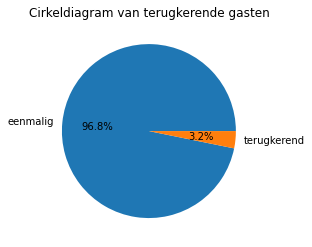

In [4]:
# Vraag 4
import matplotlib.pyplot as plt

labels = 'eenmalig' , 'terugkerend'
plt.pie(hotels.is_repeated_guest.value_counts(), labels = labels, autopct='%3.1f%%')
plt.title('Cirkeldiagram van terugkerende gasten')
plt.show()

# Er komt maar 3.2% van de gasten terug voor nog een verblijf.

In [5]:
# Vraag 5
pd.crosstab(hotels.lead_time, hotels.is_canceled, margins = True)

# Er lijkt een trend te zijn waar hoe meer tijd tussen de datum van opname en de aankomstdag zit er daar meer
# geannuleerde reservaties zijn. Ook lijkt het zo dat hoe minder dagen tussen de opname en de aankomst hoe meer mensen niet hun
# reservatie annuleren.

is_canceled,0,1,All
lead_time,,,
0,5915,430,6345
1,3139,321,3460
2,1856,213,2069
3,1634,182,1816
4,1539,176,1715
...,...,...,...
626,0,30,30
629,0,17,17
709,1,0,1


<AxesSubplot:xlabel='hotel'>

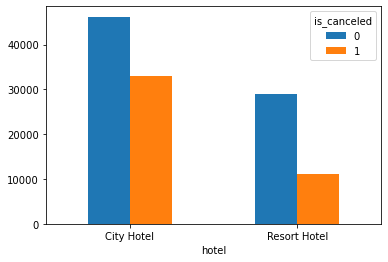

In [6]:
# Vraag 6
pd.crosstab(hotels.hotel, hotels.is_canceled).plot(kind = 'bar', rot = 0)

# Het lijkt erop dat in Resort hotels er een hogere ratio zit tussen geannuleerde en niet-geannuleerde reservaties.
# De City hotels waar ook meer reservaties zijn, zijn er vele vaker geannuleerde reservaties tegenover Resort hotels.

In [7]:
# Vraag 7
# Geen antwoord

In [8]:
# Vraag 8
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hotels['hotel'] = label_encoder.fit_transform(hotels['hotel'])

In [9]:
# Vraag 9
hotels_ML = hotels
hotels_ML.drop(['children', 'babies', 'meal', 'country'], 'columns', inplace=True)
hotels_ML = hotels_ML.dropna()
hotels_ML = vhotels_ML, columns=['arrival_date_month'])
# verandert de waarde in 0 of 1
hotels_ML = pd.get_dummies(hotels_ML, columns=['market_segment'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['distribution_channel'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['reserved_room_type'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['assigned_room_type'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['deposit_type'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['customer_type'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['reservation_status'])
hotels_ML = pd.get_dummies(hotels_ML, columns=['reservation_status_date'])

C:\Users\12101449\AppData\Local\Temp/ipykernel_19188/1020720102.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hotels_ML.drop(['children', 'babies', 'meal', 'country'], 'columns', inplace=True)


In [10]:
# Vraag 10
hotels_ML.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,...,reservation_status_date_2017-05-15,reservation_status_date_2017-05-25,reservation_status_date_2017-06-02,reservation_status_date_2017-06-10,reservation_status_date_2017-06-13,reservation_status_date_2017-06-20,reservation_status_date_2017-07-17,reservation_status_date_2017-07-20,reservation_status_date_2017-08-18,reservation_status_date_2017-08-27
2392,1,0,6,2015,42,11,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2697,1,0,24,2015,44,26,7,15,1,0,...,0,0,0,0,0,0,0,0,0,0
2867,1,0,24,2015,45,3,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2877,1,0,24,2015,45,3,2,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2878,1,0,24,2015,45,3,3,10,2,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Vraag 11
from sklearn.model_selection import train_test_split
X = hotels_ML.drop('is_canceled', axis=1)
y = hotels_ML['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
# Vraag 12
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

logistic_model = LogisticRegression(penalty= 'l2', solver='liblinear').fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

acc = accuracy_score(y_test, y_pred)  # hoeveel van de voorspelde waarden heeft het model juist?
prec = precision_score(y_test, y_pred) # maat voor hoeveel van de voorspelde overlevers ook echt de ramp overleefden
recall = recall_score(y_test, y_pred) # maat voor hoeveel van de echte overlevers ook als overlevend voorspeld zijn

print('')
print('accuracy score', acc) 
print('precision score', prec) 
print('recall score', recall) 


accuracy score 0.9818181818181818
precision score 1.0
recall score 0.6666666666666666


In [19]:
#Vraag 13
print(pred_results.head(20))

        y_test  y_pred
18235        0       0
111425       0       0
30624        0       0
15263        0       0
31325        0       0
99999        0       0
25635        0       0
39426        0       0
18296        0       0
3078         0       0
19901        0       0
2965         0       0
38400        0       0
76825        0       0
102557       0       0
2964         0       0
107551       0       0
3068         0       0
40920        0       0
3067         1       1
